In [1]:
import sys
!{sys.executable} -m pip install xgboost

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
from collections import Counter
import re
import numpy as np
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score , recall_score , precision_score
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

C:\Users\Intel\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Intel\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
df=pd.read_csv("C:\\Users\\Intel\\Desktop\\train.csv")

In [4]:
X_statement = df.Statement.values
y = df.Label.values

In [5]:
tfidf = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS,ngram_range=(1,2),max_df=0.85, min_df=0.01)

In [6]:
X_statement_tfidf = tfidf.fit_transform(X_statement)

In [7]:
X_statement_tfidf

<10240x156 sparse matrix of type '<class 'numpy.float64'>'
	with 35830 stored elements in Compressed Sparse Row format>

In [8]:
print(X_statement_tfidf)

  (0, 119)	1.0
  (1, 39)	0.5294281644001939
  (1, 140)	0.5314428914439244
  (1, 103)	0.3979666258043877
  (1, 9)	0.5281068420494406
  (2, 63)	0.3931116491916784
  (2, 24)	0.3777636337773943
  (2, 74)	0.42110038462439503
  (2, 80)	0.4351085096417361
  (2, 18)	0.4121269295028799
  (2, 64)	0.40775521229060874
  (3, 57)	0.5540196688458594
  (3, 21)	0.5743056073493629
  (3, 58)	0.6026900330178057
  (5, 1)	0.5767340314085719
  (5, 155)	0.47374400626037905
  (5, 90)	0.6655407377070033
  (6, 155)	1.0
  (7, 75)	0.7788829733251277
  (7, 154)	0.6271692864484105
  (8, 140)	0.6693907158977548
  (8, 82)	0.5184783201992679
  (8, 89)	0.5320679476845385
  (9, 119)	0.21058353739942162
  (9, 82)	0.3446615907360058
  :	:
  (10233, 148)	0.32828740712117127
  (10233, 135)	0.26457973461153284
  (10233, 99)	0.2763645159930208
  (10233, 106)	0.3211429806003453
  (10233, 120)	0.2998129284798258
  (10233, 40)	0.3075346766723509
  (10233, 45)	0.3172309465588069
  (10233, 70)	0.3155706849363225
  (10233, 48)	0.322

In [9]:
#split daaset into random test and training sets
X_statement_tfidf_train, X_statement_tfidf_test, y_statement_train, y_statement_test = train_test_split(X_statement_tfidf,y, test_size = 0.2, random_state=1234)

In [10]:
X_statement_tfidf_train

<8192x156 sparse matrix of type '<class 'numpy.float64'>'
	with 28885 stored elements in Compressed Sparse Row format>

In [11]:
 X_statement_tfidf_train1= pd.DataFrame(list(map(lambda x: list(x), X_statement_tfidf_train)))

In [12]:
X_statement_tfidf_train1.head()

,0
0,"(0, 42)\t0.5152126019143766\n (0, 41)\t0.49..."
1,"(0, 105)\t0.4791772212097031\n (0, 50)\t0.4..."
2,"(0, 16)\t0.4429043869429078\n (0, 28)\t0.52..."
3,"(0, 127)\t0.4512492807981014\n (0, 126)\t0...."
4,"(0, 15)\t0.407867111630509\n (0, 14)\t0.391..."


In [13]:
#logistic Regression
lr_statement = LogisticRegression(penalty='l1')

In [14]:
#training model
lr_statement.fit(X_statement_tfidf_train, y_statement_train)

#predict
y_statement_pred = lr_statement.predict(X_statement_tfidf_test)

In [15]:
print ("Logistig Regression F1 and Accuracy Scores : \n")
print ( "F1 score {:.4}%".format( f1_score(y_statement_test, y_statement_pred, average='macro')*100 ) )
print ( "Accuracy score {:.4}%".format(accuracy_score(y_statement_test, y_statement_pred)*100) )

Logistig Regression F1 and Accuracy Scores : 

F1 score 58.24%
Accuracy score 61.77%


In [16]:
cros_val_list = cross_val_score(lr_statement, X_statement_tfidf,y,cv=7)
print (cros_val_list)
print (cros_val_list.mean())

[0.61885246 0.60423787 0.60970608 0.58851675 0.61107314 0.58823529
 0.61422709]
0.6049783819862595


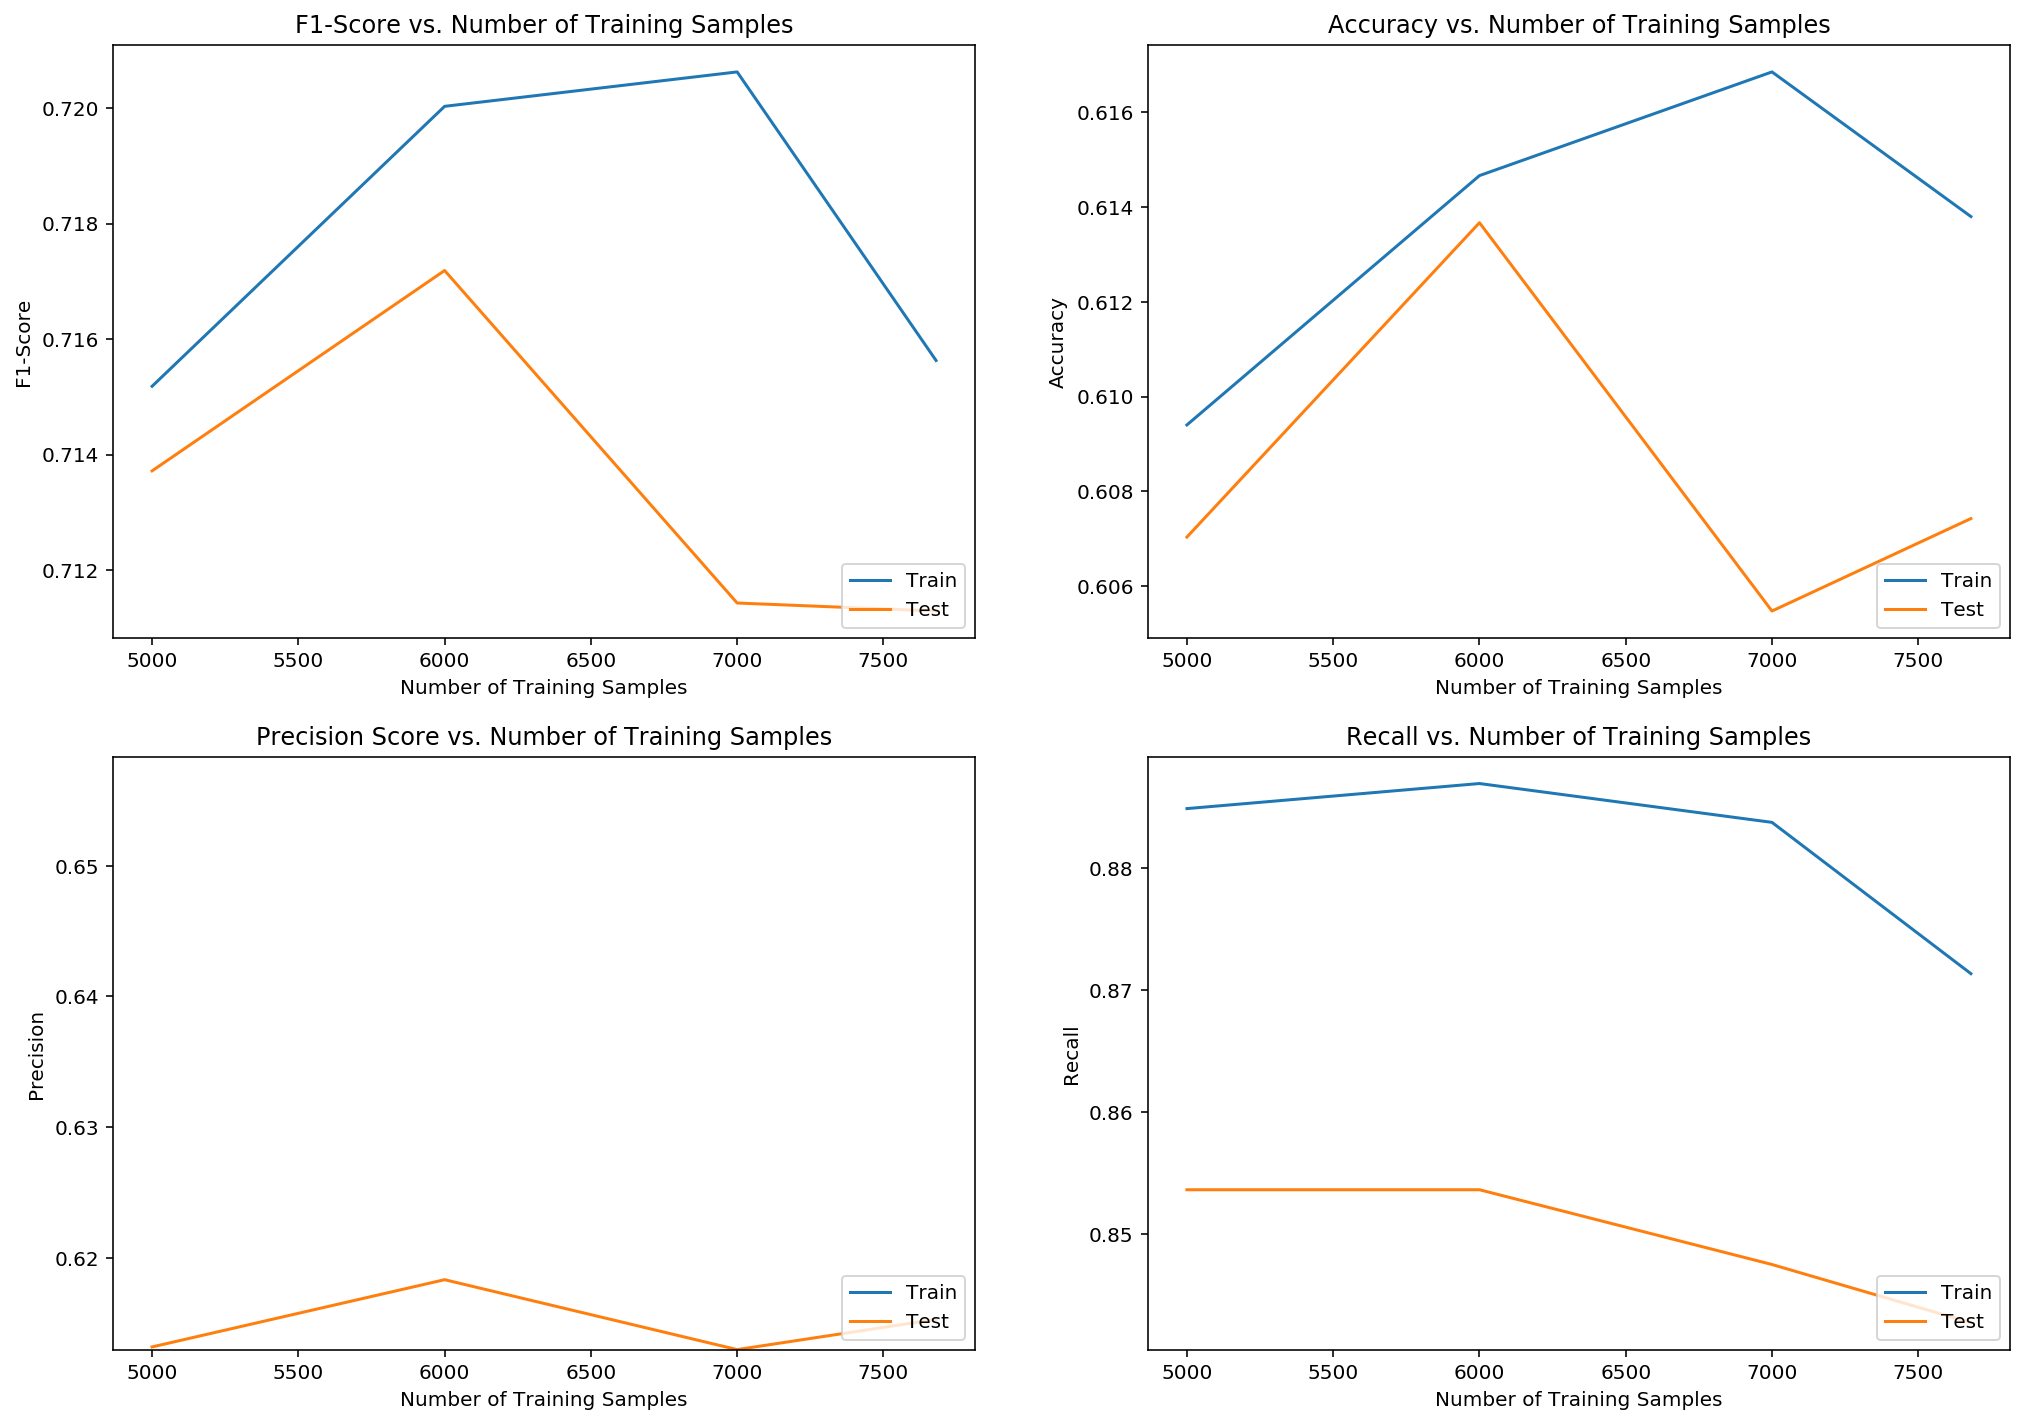

In [63]:
#Learning curve for statement logistic regression
xtrain,xtest,ytrain,ytest = train_test_split(X_statement_tfidf,y)
cv = cross_validation(lr_statement, xtrain, ytrain , n_splits=5,init_chunk_size = 5000, chunk_spacings = 1000, average = "binary")
cv.validate_for_holdout_set(xtest, ytest)
cv.plot_learning_curve()

In [64]:
rcf_statement = RandomForestClassifier(n_estimators=100,n_jobs=3)

In [65]:
rcf_statement.fit(X_statement_tfidf_train, y_statement_train)
y_rc_statement_pred = rcf_statement.predict(X_statement_tfidf_test)

In [66]:
print ("Random Forest F1 and Accuracy Scores : \n")
print ( "F1 score {:.4}%".format( f1_score(y_statement_test, y_rc_statement_pred, average='macro')*100 ) )
print ( "Accuracy score {:.4}%".format(accuracy_score(y_statement_test, y_rc_statement_pred)*100) )

Random Forest F1 and Accuracy Scores : 

F1 score 53.12%
Accuracy score 59.42%


In [67]:
cros_val_list = cross_val_score(rcf_statement, X_statement_tfidf,y,cv=5)
print (cros_val_list)
print (cros_val_list.mean())

[0.59785261 0.60175695 0.58837891 0.60527601 0.59648266]
0.5979494286235922


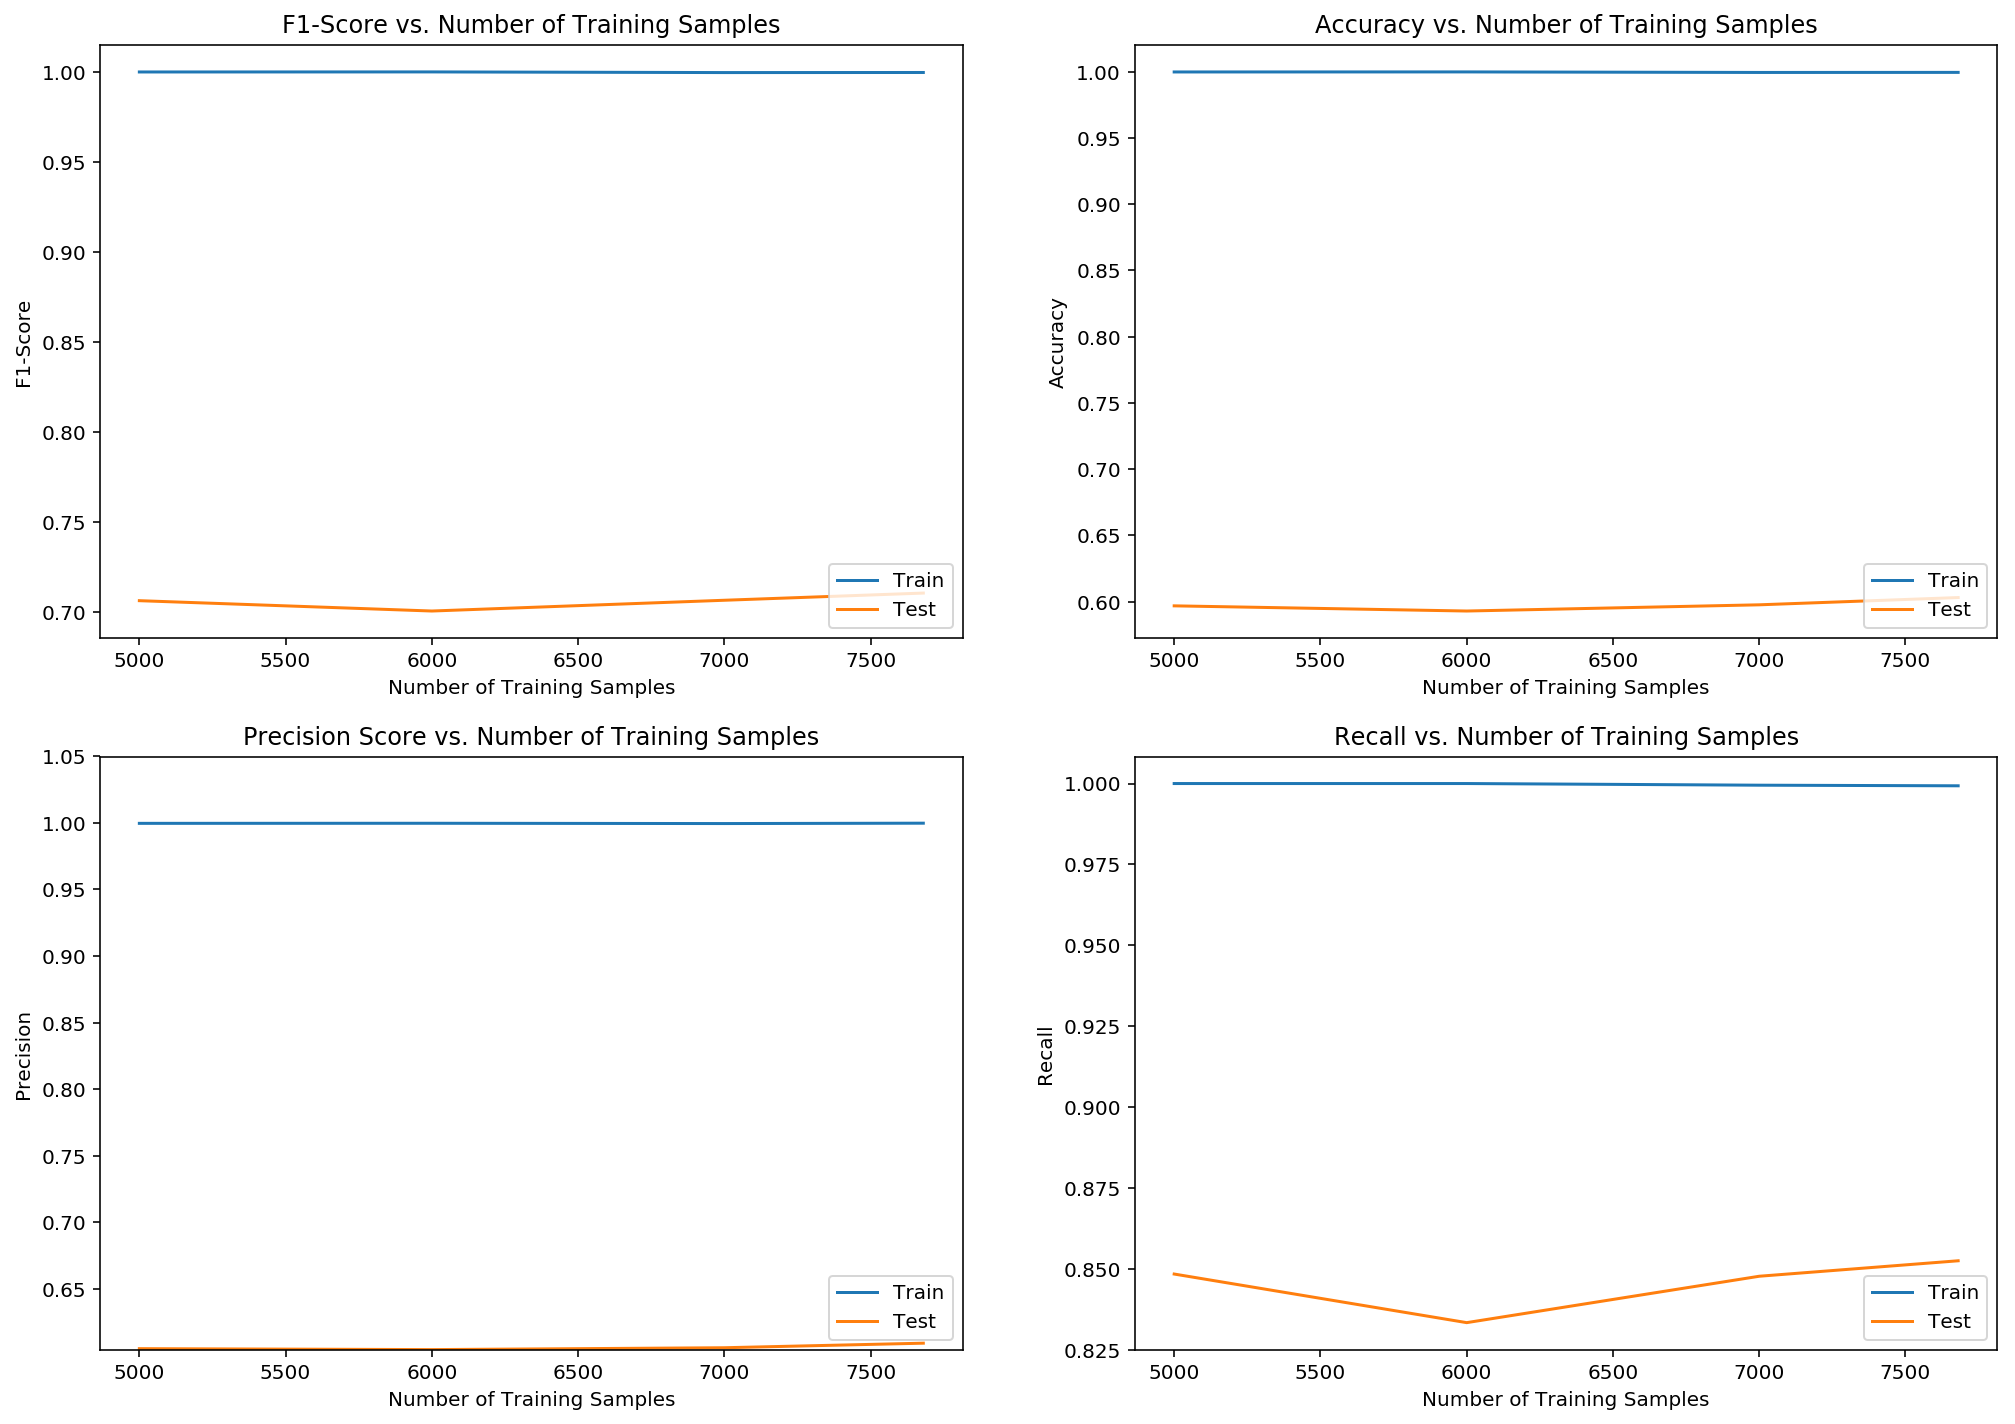

In [68]:
xtrain,xtest,ytrain,ytest = train_test_split(X_statement_tfidf,y)

cv = cross_validation(rcf_statement, xtrain, ytrain , n_splits=5,init_chunk_size = 5000, chunk_spacings = 1000, average = "binary")
cv.validate_for_holdout_set(xtest, ytest)
cv.plot_learning_curve()

In [69]:
xgb_statement = XGBClassifier()

In [70]:
xgb_statement.fit(X_statement_tfidf_train, y_statement_train)
y_xgb_statement_pred = xgb_statement.predict(X_statement_tfidf_test)

C:\Users\Intel\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [71]:
print( "XGBoost F1 and Accuracy Scores : \n")
print ( "F1 score {:.4}%``".format( f1_score(y_statement_test, y_xgb_statement_pred, average='macro')*100 ) )
print ( "Accuracy score {:.4}%".format(accuracy_score(y_statement_test, y_xgb_statement_pred)*100) )

XGBoost F1 and Accuracy Scores : 

F1 score 50.33%``
Accuracy score 59.38%


C:\Users\Intel\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Intel\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Intel\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Intel\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

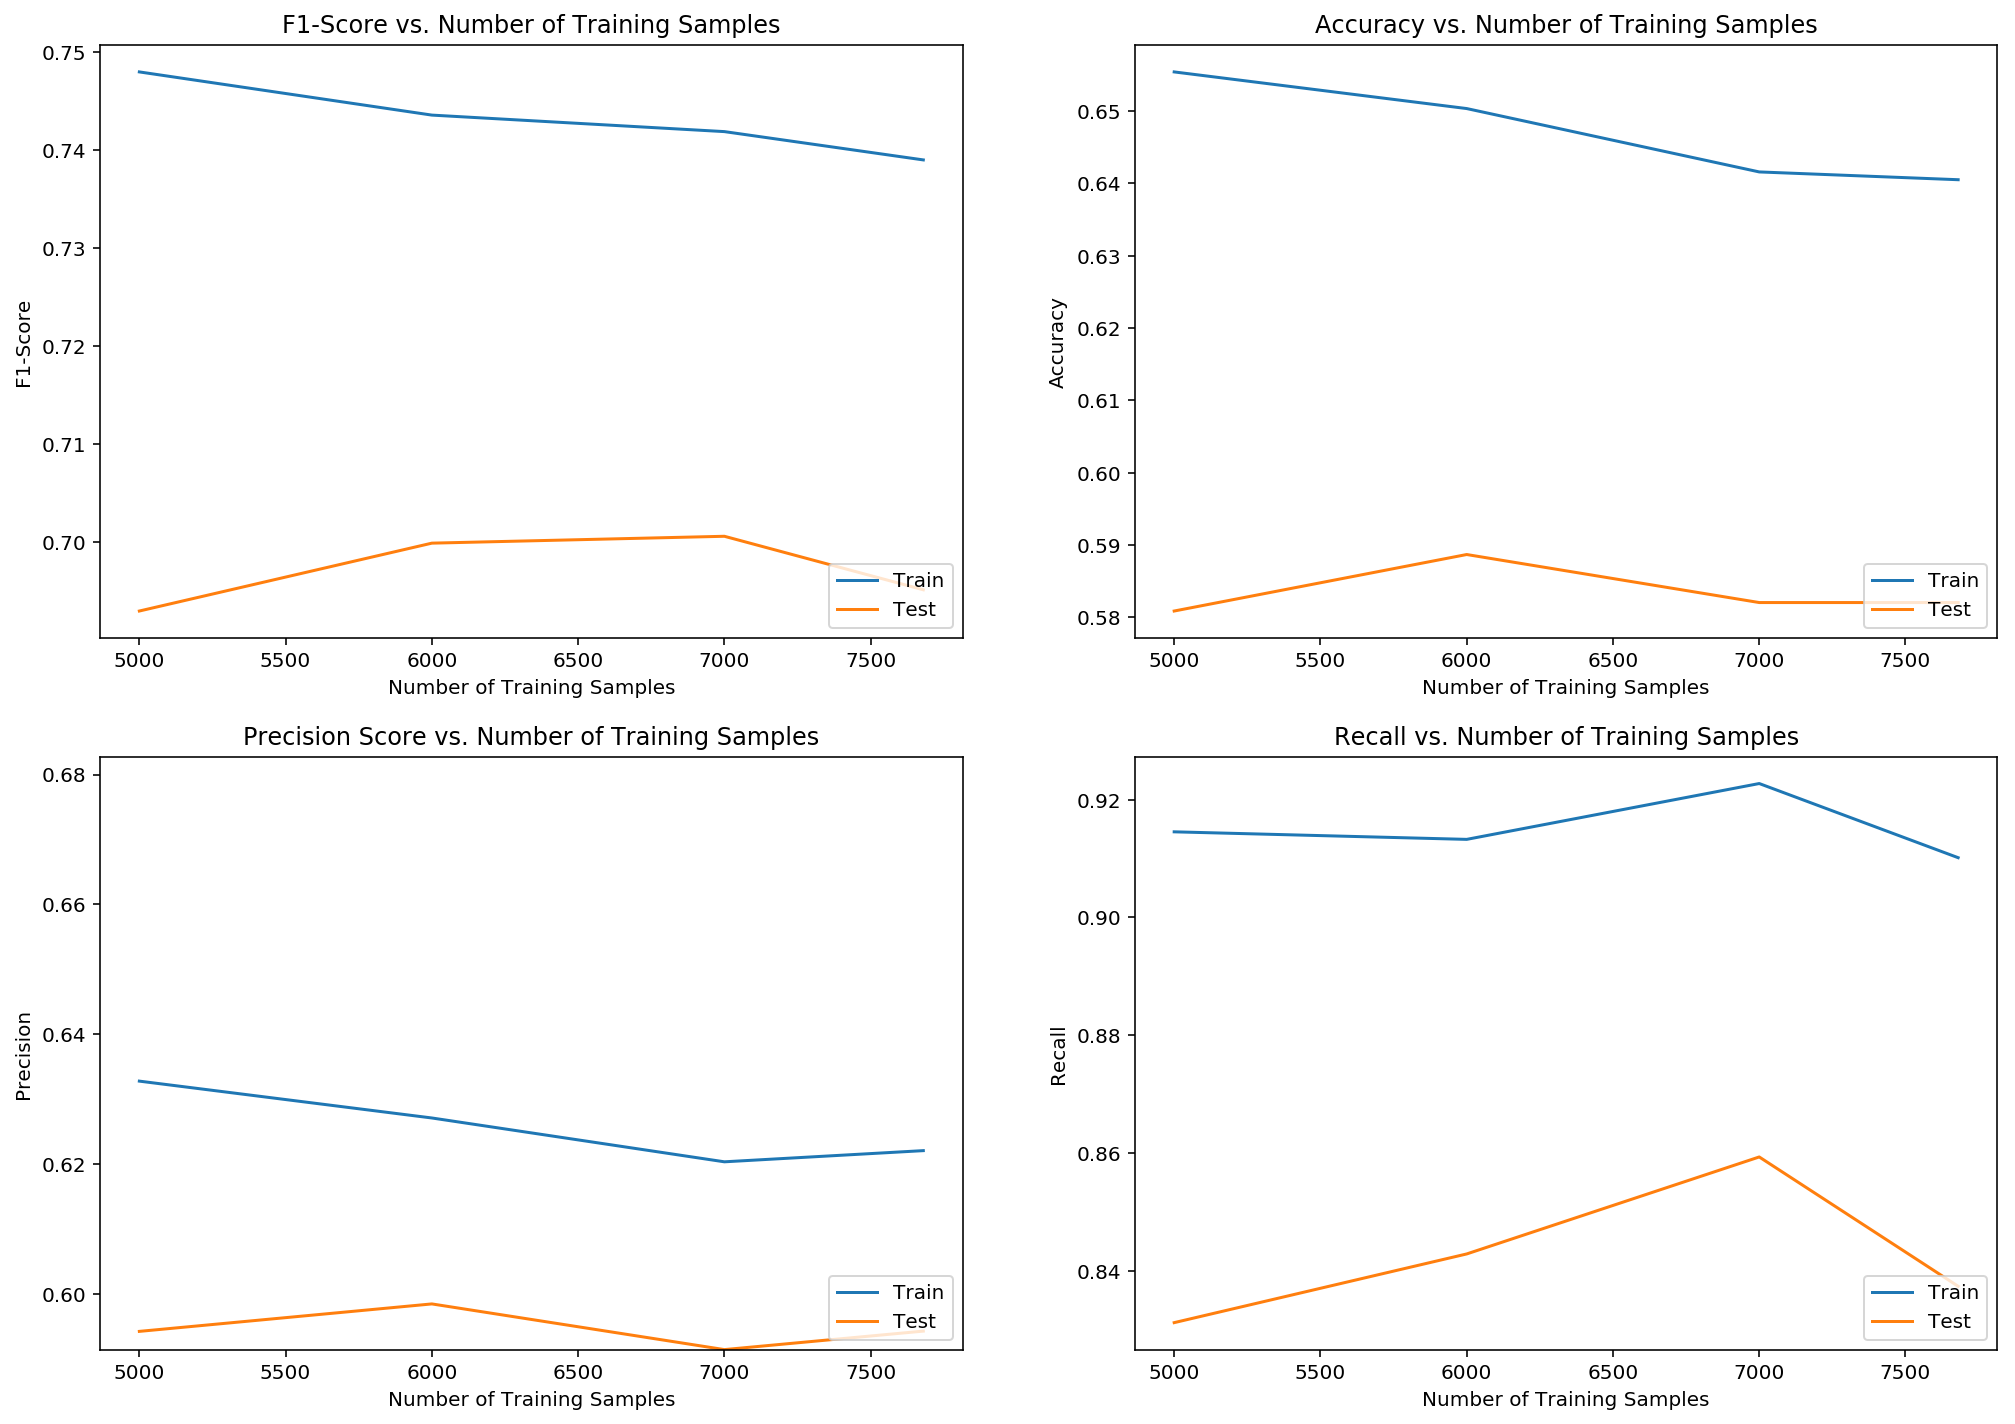

In [23]:
xtrain,xtest,ytrain,ytest = train_test_split(X_statement_tfidf,y)

cv = cross_validation(xgb_statement, xtrain, ytrain , n_splits=5,init_chunk_size = 5000, chunk_spacings = 1000, average = "binary")
cv.validate_for_holdout_set(xtest, ytest)
cv.plot_learning_curve()

In [35]:
stat=pd.read_csv("C:\\Users\\Intel\\Desktop\\sample.csv")

In [36]:
tfidf = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS,ngram_range=(1,2))

In [39]:
stat_tfidf=tfidf.transform(stat)

In [40]:
rcf_statement.fit(X_statement_tfidf_train, y_statement_train)
y_rc_statement_pred = rcf_statement.predict(stat_tfidf)

ValueError: Number of features of the model must match the input. Model n_features is 156 and input n_features is 1 

In [60]:
#Sample fake news
stat=pd.read_csv("C:\\Users\\Intel\\Desktop\\sample.csv")

In [61]:
stat_tfidf_test=stat.Label.values

In [62]:
X_statement_tfidf_train,stat_tfidf,y_statement_train,stat_tfidf_test=train_test_split(X_statement_tfidf,y, test_size = 0.2, random_state=1234)

In [63]:
#Sample fake news using random forest
rcf_statement.fit(X_statement_tfidf_train, y_statement_train)
y_rc_statement_pred = rcf_statement.predict(stat_tfidf)

In [64]:
print ("Random Forest F1 and Accuracy Scores : \n")
print ( "F1 score {:.4}%".format( f1_score(stat_tfidf_test, y_rc_statement_pred, average='macro')*100 ) )
print ( "Accuracy score {:.4}%".format(accuracy_score(stat_tfidf_test, y_rc_statement_pred)*100) )

Random Forest F1 and Accuracy Scores : 

F1 score 57.45%
Accuracy score 58.74%


In [65]:
#sample fake news using LR
#training model
lr_statement.fit(X_statement_tfidf_train, y_statement_train)

#predict
y_statement_pred = lr_statement.predict(stat_tfidf)

In [66]:
print ("Logistig Regression F1 and Accuracy Scores : \n")
print ( "F1 score {:.4}%".format( f1_score(stat_tfidf_test, y_statement_pred, average='macro')*100 ) )
print ( "Accuracy score {:.4}%".format(accuracy_score(stat_tfidf_test, y_statement_pred)*100) )

Logistig Regression F1 and Accuracy Scores : 

F1 score 58.24%
Accuracy score 61.77%


In [67]:
#sample fake news Using XGBoost
xgb_statement.fit(X_statement_tfidf_train, y_statement_train)
y_xgb_statement_pred = xgb_statement.predict(X_statement_tfidf_test)

C:\Users\Intel\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [68]:
print( "XGBoost F1 and Accuracy Scores : \n")
print ( "F1 score {:.4}%``".format( f1_score(stat_tfidf_test, y_xgb_statement_pred, average='macro')*100 ) )
print ( "Accuracy score {:.4}%".format(accuracy_score(stat_tfidf_test, y_xgb_statement_pred)*100) )

XGBoost F1 and Accuracy Scores : 

F1 score 51.44%``
Accuracy score 59.77%
